####  Import Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


#### Load the Breast Cancer Dataset

In [ ]:

data = load_breast_cancer()
# Convert to DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target) 


In [4]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
# Make Predictions
y_pred = model.predict(X_test)


In [7]:
#Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


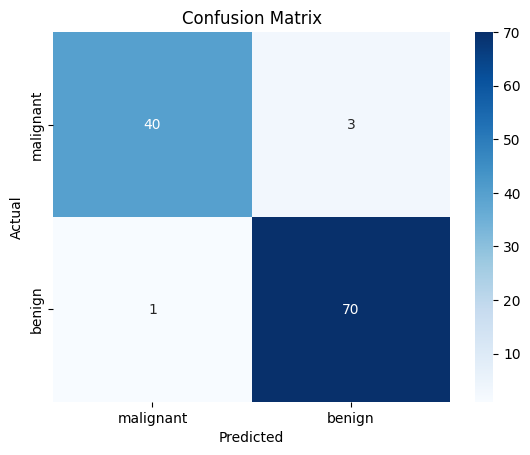

In [8]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))



Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Ethical Reflection
#### Potential Biases in the Dataset:
- Although the Breast Cancer Wisconsin dataset is widely used, it still has limitations that can lead to biased models:

- Demographic Bias: The dataset lacks detailed demographic information (e.g., age, ethnicity, socio-economic background), so the model may not perform equally well across all population groups.

- Data Collection Bias: If the dataset was collected in one region or from a specific hospital, it may not generalize well to global populations.

- Class Imbalance: While this dataset is fairly balanced, in real-world medical datasets, one class (e.g., malignant) may be underrepresented.

#### IBM AI Fairness 360 (AIF360) is an open-source library with tools to measure and reduce bias in machine learning models.

- It can evaluate fairness metrics such as disparate impact, statistical parity, and equal opportunity.

- If bias is detected, it offers pre-processing, in-processing, or post-processing algorithms to mitigate it.

- For example, it can rebalance the dataset or adjust predictions to make sure both benign and malignant cases are fairly represented across demographic groups.

